# Assignment #1 - Supervised Learning

## Part #1 – Classification

In [16]:
from sklearn.datasets import make_blobs
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn import metrics
from matplotlib.pyplot import figure
%matplotlib inline

## Part #1-1
Generate and plot a 2D training dataset with two classes of 500 points. Similarly, generate a testing
dataset of 50 points.

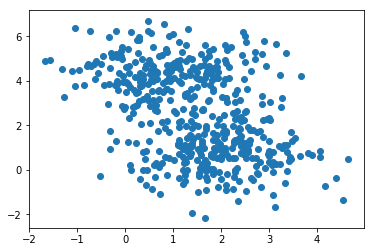

In [17]:
X_train, y_train = make_blobs(n_samples=500, centers=2, n_features=2, random_state = 0)

# plot a 2d training dataset with 2 classes of 500 points
plt.scatter(X_train[:,0], X_train[:,1])
plt.show()

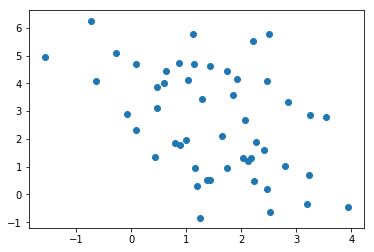

In [18]:
# generate a 2d testing dataset with 2 classes of 50 points
X_test, y_test = make_blobs(n_samples=50, centers=2, n_features=2, random_state = 0)

plt.scatter(X_test[:,0], X_test[:,1])
plt.show()

In [19]:
#First, lets check the datasets with the function of shape
print ('Train set:', X_train.shape)
print ('Test set:', X_test.shape)

Train set: (500, 2)
Test set: (50, 2)


## Part #1-2
Fit Linear SVM and KNN classifiers on the training dataset. Select the best parameters using cross
validation method.

In [20]:
#since I have regression problem (with real numbers) instead of a classification problem, then I use the regression version of KNN
#serch for an optimal value of k
k_range=range(1,21)
k_error=[]
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train, y_train)
    yhat = knn.predict(X_test)
    k_error.append(np.mean(yhat != y_test))

print ("k_error:" , k_error)


k_error: [0.02, 0.06, 0.06, 0.08, 0.12, 0.12, 0.14, 0.16, 0.2, 0.2, 0.2, 0.2, 0.24, 0.26, 0.28, 0.28, 0.3, 0.32, 0.32, 0.32]


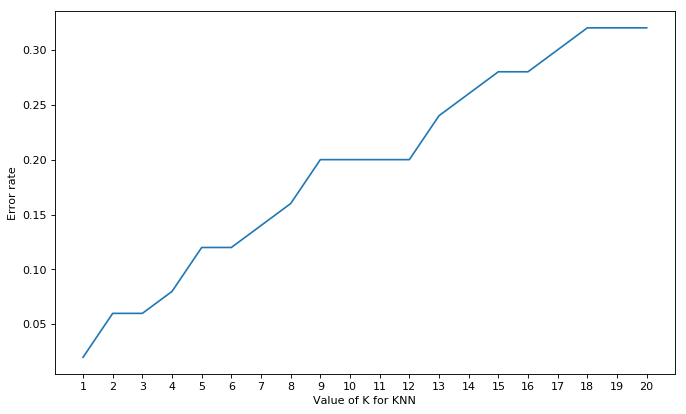

In [21]:
# plot to see clearly
figure(figsize=(10, 6), dpi=80)
plt.plot(k_range, k_error)
plt.xlabel('Value of K for KNN')
plt.ylabel('Error rate')
plt.xticks(np.arange(min(k_range), max(k_range)+1, 1.0))

plt.show()

## Part #1-3
Apply Linear SVM and KNN algorithms on the testing dataset. Compare the results.

In [22]:
# Apply KNN algorithms on the testing dataset and select k=7 based on above cross validation check
knn = KNeighborsRegressor(n_neighbors = 7)

# train the model
knn.fit(X_train, y_train)

#Finding the accuracy score.
print('accuracy: ', knn.score(X_test, y_test))

accuracy:  0.9493877551020408


In [23]:
#Apply Linear SVM algorithms on the testing dataset.
svm_method = svm.LinearSVC()
svm_method.fit(X_train, y_train)

#Finding the accuracy score.
print("SVM Test set Accuracy: ", svm_method.score(X_test, y_test))

SVM Test set Accuracy:  0.98


## Part #1-4
Add some noise (10%) to the generated training dataset by flipping the labels. Evaluate the classifiers’ performance trained on the noisy dataset.

In [26]:
#np.random
X_noise = np. random. normal(0, .2, X_train.shape)
X_train_noisy3 = X_train + X_noise
print(X_train_noisy3.shape)

y_noise = np. random. normal(0, .2, y_train.shape)
y_train_noisy3 = y_train + y_noise
print(y_train_noisy3.shape)

knn_noisy3 = KNeighborsRegressor(n_neighbors = 7)
#train KNN on the noisy data
knn_noisy3.fit(X_train_noisy3,y_train_noisy3)

# print the score
print("KNN Test set Accuracy on noisy data: ", knn_noisy3.score(X_test, y_test))

#build SVM model on noisy training data
svm_method_noisy3 = svm.LinearSVC()
#train SVM on the noisy data
svm_method_noisy3.fit(X_train_noisy3, y_train)
# print the score
print('SVM Test set Accuracy on noisy data: ', svm_method_noisy3.score(X_test, y_test))

(500, 2)
(500,)
KNN Test set Accuracy on noisy data:  0.8931645940319862
SVM Test set Accuracy on noisy data:  0.98


# Part #2 – Regression

# Part #2-1
Generate a regression problem of 500 training data points. Similarly, generate a testing dataset of
30 points.

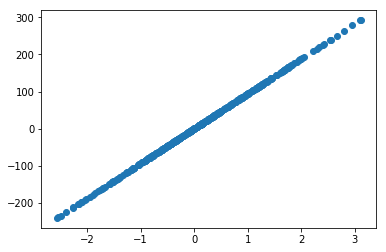

In [10]:
# generate regression training dataset
X_train_reg, y_train_reg = make_regression(n_samples=500, n_features=1, noise=0.1)
# plot regression training dataset
plt.scatter(X_train_reg,y_train_reg)
plt.show()

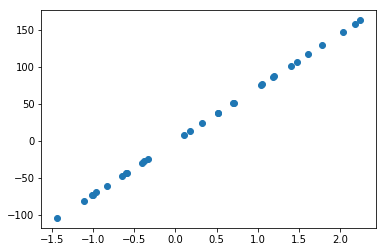

In [11]:
# generate regression testing dataset
X_test_reg, y_test_reg = make_regression(n_samples=30, n_features=1, noise=0.1)
# plot regression testing dataset
plt.scatter(X_test_reg,y_test_reg)
plt.show()

In [12]:
#First, lets check the datasets with the function of shape
print ('Train set:', X_train_reg.shape)
print ('Test set:', X_test_reg.shape)

Train set: (500, 1)
Test set: (30, 1)


# Part #2-2
Fit KNN and Linear regressors on the training dataset. Select the best parameters using cross validation method.

In [13]:
#since I have regression problem (with real numbers) instead of a classification problem, then I use the regression version of KNN
#serch for an optimal value of k
k_range=range(1,11)
k_error=[]
for k in k_range:
    knn_reg = KNeighborsRegressor(n_neighbors = k)
    knn_reg.fit(X_train_reg, y_train_reg)
    yhat_reg = knn_reg.predict(X_test_reg)
    k_error.append(np.mean(yhat_reg != y_test_reg))

print ("k_error:" , k_error)

k_error: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


# Part #2-3
Apply KNN and Linear regression algorithms on the testing dataset. Compare the results.

In [14]:
# Apply KNN algorithms on the testing dataset.
knn_reg = KNeighborsRegressor(n_neighbors = 5)

# train the model
knn_reg.fit(X_train_reg,y_train_reg)

#Finding the accuracy regression score.
print("KNN Test set Accuracy for regression: ", knn_reg.score(X_test_reg, y_test_reg))

KNN Test set Accuracy for regression:  0.8986257890787865


In [15]:
#Apply Linear Lm algorithms on the testing dataset.
lm=LinearRegression()

# train the model
lm.fit(X_train_reg, y_train_reg)

#Finding the accuracy score.
print("lm Test set Accuracy for regression: ", lm.score(X_test_reg, y_test_reg))

lm Test set Accuracy for regression:  0.9023446411848609
